In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os


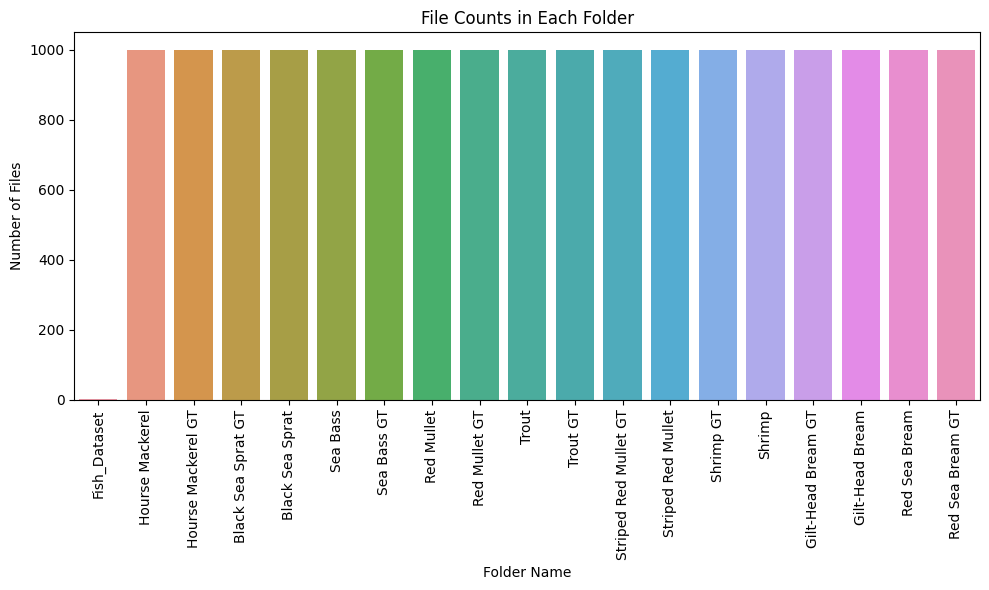

In [104]:
# Klasör ve dosya isimlerini tutmak için bir liste oluştur
folder_names = []
file_counts = []

# Klasördeki tüm dosyaların adlarını ve sayısını al
for dirname, _, filenames in os.walk('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'):
    if len(filenames) > 0:
        folder_names.append(dirname.split("/")[-1])  # Sadece klasör adını almak için ayırıyoruz
        file_counts.append(len(filenames))  # Dosya sayısını ekliyoruz

# Verileri bir DataFrame'e aktarıyoruz
df = pd.DataFrame({'Folder': folder_names, 'File Count': file_counts})

# Grafik boyutunu ayarla
plt.figure(figsize=(10, 6))

# Bar grafiği oluştur
sns.barplot(x='Folder', y='File Count', data=df)

# Grafik başlığı ve eksen etiketlerini ekle
plt.title('File Counts in Each Folder')
plt.xticks(rotation=90)  # Klasör adlarını döndürerek okunabilir yapıyoruz
plt.xlabel('Folder Name')
plt.ylabel('Number of Files')

# Grafiği göster
plt.tight_layout()
plt.show()

In [105]:
# Etiketleri ve dosya yollarını depolamak için listeler
label = []
path = []

# Veri setinin bulunduğu klasör yolu
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

# Klasörler ve dosyalar üzerinde gezerek .png dosyalarını buluyoruz
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':  # Sadece .png dosyalarını al
            label.append(os.path.split(dir_name)[-1])  # Klasör adını etiket olarak al
            path.append(os.path.join(dir_name, filename))  # Dosya yolunu al



In [107]:
# DataFrame oluşturma
data = pd.DataFrame({
    'path': path,   # Dosya yolları
    'label': label  # Etiketler (sınıf isimleri)
})

# İlk birkaç satırı görmek için
print(data.head())
data.tail()

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel


,path,label
17995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream GT
17996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream GT
17997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream GT
17998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream GT
17999,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream GT


In [109]:
# Daha önce hazırladığınız `data` DataFrame'inden dosya yolları ve etiketleri alınır
file_paths = data['path'].values
labels = data['label'].values

In [110]:
# Resimlerin boyutlandırılması ve yüklenmesi
X = []
for file in file_paths:
    img = load_img(file, target_size=(64, 64))  # Resmi 224x224 boyutuna yeniden boyutlandır
    img = img_to_array(img)  # Resmi array'e çevir
    X.append(img)
X = np.array(X)  # Listeyi numpy array'e çevir


In [111]:
print(X)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [112]:
# Etiketleri sayısal formata çevirme
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(labels)

In [181]:
from sklearn.model_selection import train_test_split

# Öncelikle orijinal veri setinizi kullanın (X, y)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [182]:
# Verilerin boyutlarını kontrol etme
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (14400, 64, 64, 3)
X_test shape: (1800, 64, 64, 3)
y_train shape: (14400,)
y_test shape: (1800,)


In [183]:
# Düzleştirme işlemi
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # (11520, 12288)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)        # (2880, 12288)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)      # (3600, 12288)


In [184]:
# Yeni şekilleri kontrol et
print('X_train shape after flattening:', X_train_flattened.shape)
print('X_val shape after flattening:', X_val_flattened.shape)
print('X_test shape after flattening:', X_test_flattened.shape)

X_train shape after flattening: (14400, 12288)
X_val shape after flattening: (1800, 12288)
X_test shape after flattening: (1800, 12288)


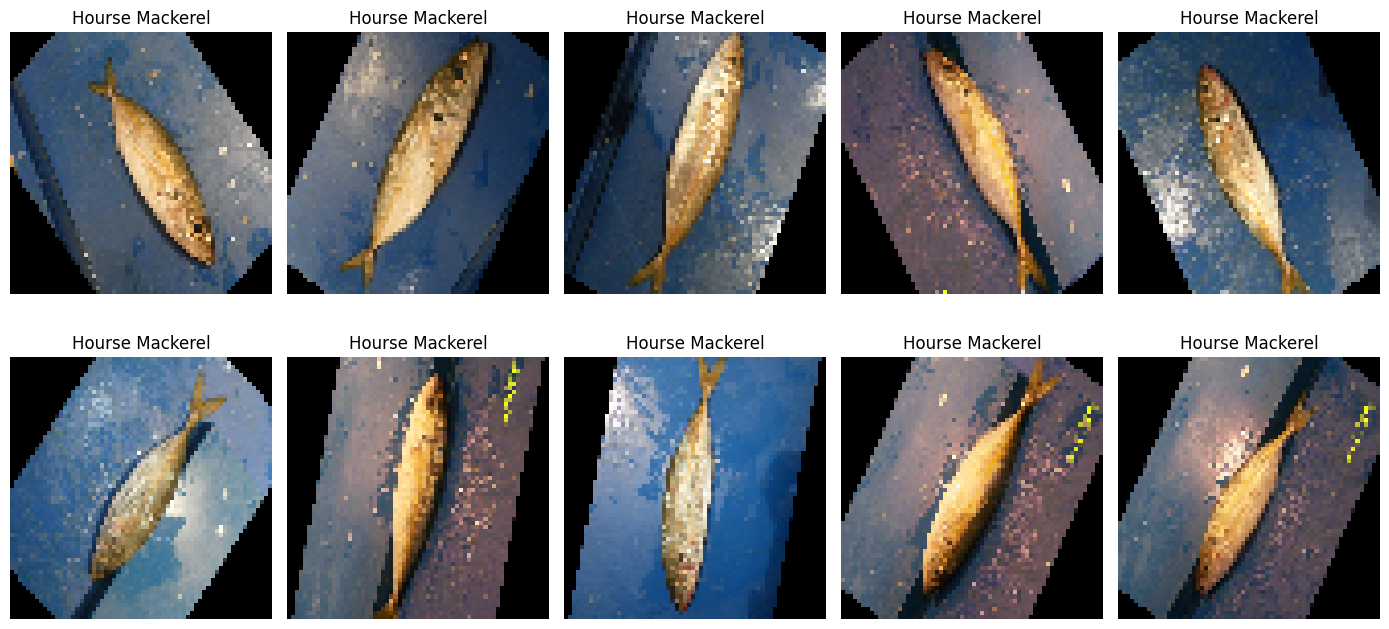

In [185]:
# İlk 10 resmi görüntüleyelim
plt.figure(figsize=(14, 7))

for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 satır ve 5 sütundan oluşan bir alt grafik
    plt.imshow(X[i].astype('uint8'))  # Resmi görüntüle (veri tipini uygun hale getir)
    plt.title(labels[i])  # Etiketi başlık olarak ayarla
    plt.axis('off')  # Eksenleri kapat

# Grafiği göster
plt.tight_layout()
plt.show()

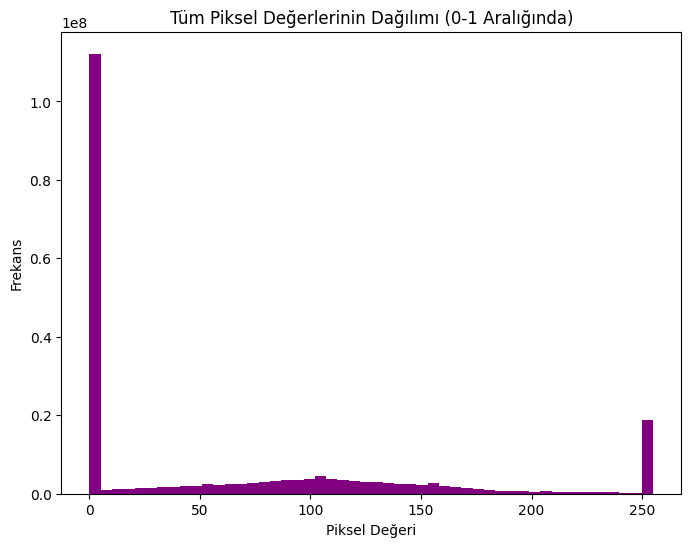

In [117]:
# Görsellerdeki piksel yoğunluğunu inceleyelim.
plt.figure(figsize=(8, 6))
plt.hist(X.flatten(), bins=50, color='purple')
plt.title('Tüm Piksel Değerlerinin Dağılımı (0-1 Aralığında)')
plt.xlabel('Piksel Değeri')
plt.ylabel('Frekans')
plt.show()

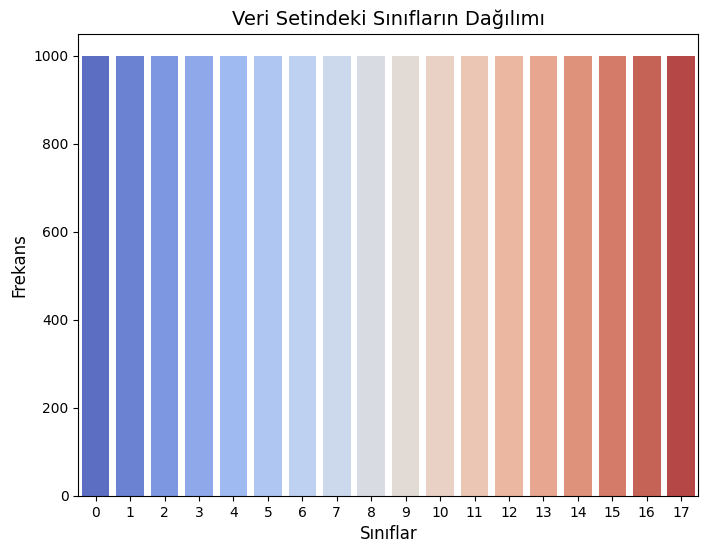

In [66]:
# Tüm veri setindeki sınıf dağılımını görüntüleyelim.
plt.figure(figsize=(8, 6))

# 'y' dizisi sınıf etiketlerini içeriyor, bu yüzden 'hue' kullanılmamalı
sns.countplot(x=y, palette='coolwarm')

plt.title('Veri Setindeki Sınıfların Dağılımı', fontsize=14)
plt.xlabel('Sınıflar', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

# Grafiği göster
plt.show()

In [118]:
# Görüntü boyutunu kontrol et
print('X_train shape before flattening:', X_train.shape)
print('X_test shape before flattening:', X_test.shape)

X_train shape before flattening: (14400, 64, 64, 3)
X_test shape before flattening: (3600, 64, 64, 3)


In [174]:
# 64x64 boyutundaki görüntüleri düzleştiriyoruz.
X_train = X_train.reshape((X_train.shape[0], 64 * 64 * 3)).astype('float32') / 255
X_val = X_val.reshape((X_val.shape[0], 64 * 64 * 3)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 64 * 64 * 3)).astype('float32') / 255

# Hedef değişkenleri numpy dizisi haline getirin (eğer zaten değilse)
y_train = np.array(y_train).reshape(-1)  # 1D diziye çevirin
y_val = np.array(y_val).reshape(-1)
y_test = np.array(y_test).reshape(-1)

print(y_train)
print(y_val)
print(y_test)

[1. 0. 1. ... 0. 1. 0.]
[1. 0. 1. ... 0. 1. 0.]
[1. 0. 0. ... 0. 1. 0.]


In [175]:
# Düzleştirme işlemi
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # (14400, 64*64*3)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)    # (3600, 64*64*3)
X_val_flattened = X_val.reshape(X_val.shape[0], -1) 

# Yeni şekilleri kontrol et
print('X_train shape after flattening:', X_train_flattened.shape)  # (14400, 12288)
print('X_test shape after flattening:', X_test_flattened.shape)    # (3600, 12288)


X_train shape after flattening: (11520, 12288)
X_test shape after flattening: (3600, 12288)


In [180]:
print("y_train shape:", y_train.shape)  # (11520,)
print("y_val shape:", y_val.shape)      # (2880,)
print("y_test shape:", y_test.shape)      # (2880,)


y_train shape: (414720,)
y_val shape: (103680,)
y_test shape: (129600,)


In [122]:
# İlk 5 gözlemi görüntüleyelim
print("First 5 observations in y_train:", y_train[:5])


First 5 observations in y_train: [9 2 9 8 0]


In [178]:
from sklearn.model_selection import train_test_split

# X_train ve y_train boyutları uyumluysa ayırma işlemi
if X_train.shape[0] == y_train.shape[0]:
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
else:
    print("X_train ve y_train boyutları uyuşmuyor.")


X_train ve y_train boyutları uyuşmuyor.


In [160]:
# Sınıf sayısını kontrol edin
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)  # Beklenen sınıf sayısı 10 olmalı

Number of classes: 2


# OneHot Encoding ile Sınıf Değerlerini Encode Etme

In [186]:
# Benzersiz sınıfları kontrol et
unique_train_classes = np.unique(y_train)
unique_val_classes = np.unique(y_val)
print("Unique classes in y_train:", unique_train_classes)
print("Unique classes in y_val:", unique_val_classes)

Unique classes in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Unique classes in y_val: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [187]:
from keras.utils import to_categorical

num_classes = len(unique_train_classes)  # y_train'deki benzersiz sınıf sayısını kullanın
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_val_onehot = to_categorical(y_val, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Sonuçları kontrol et
print("y_train_onehot shape:", y_train_onehot.shape)  # (11520, num_classes)
print("y_val_onehot shape:", y_val_onehot.shape)      # (2880, num_classes)
print("y_test_onehot shape:", y_test_onehot.shape)    # (3600, num_classes)


y_train_onehot shape: (14400, 18)
y_val_onehot shape: (1800, 18)
y_test_onehot shape: (1800, 18)


In [196]:
# Kategorik etiketleri one-hot encoding formatına dönüştürüyoruz
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)



In [197]:
print("X_train shape:", X_train_flattened.shape)
print("y_train shape:", y_train_onehot.shape)  # Yüzde değer
print("X_val shape:", X_val_flattened.shape)
print("y_val shape:", y_val_onehot.shape)      # Yüzde değer
print("X_test shape:", X_test_flattened.shape)
print("y_test shape:", y_test_onehot.shape)    # Yüzde değer

X_train shape: (14400, 12288)
y_train shape: (14400, 18)
X_val shape: (1800, 12288)
y_val shape: (1800, 18)
X_test shape: (1800, 12288)
y_test shape: (1800, 18)


In [199]:
# ANN için Sequential modeli başlatalım.
model = tf.keras.models.Sequential()

# Input Layer (giriş katmanı)
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(64 * 64 * 3,)))  # 12288 boyut
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(18, activation='softmax'))  # 18 sınıf için softmax aktivasyonu

# Modelin özeti
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,458,514 (24.64 MB)

 Trainable params: 6,458,514 (24.64 MB)

 Non-trainable params: 0 (0.00 B)

In [200]:
# Modeli derleyelim
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [201]:
results = model.fit(X_train_flattened, 
                    y_train_onehot, 
                    epochs=20, 
                    batch_size=128, 
                    validation_data=(X_val_flattened, y_val_onehot))


Epoch 1/20


I0000 00:00:1729793165.022626     295 service.cc:145] XLA service 0x7b45f800b740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729793165.022681     295 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 26/113 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0914 - loss: 662.1935

I0000 00:00:1729793166.926821     295 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.1758 - loss: 338.7305 - val_accuracy: 0.4506 - val_loss: 12.0073
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4813 - loss: 10.8164 - val_accuracy: 0.4578 - val_loss: 11.4171
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5151 - loss: 8.9263 - val_accuracy: 0.5350 - val_loss: 7.5107
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5818 - loss: 5.7101 - val_accuracy: 0.4444 - val_loss: 8.9542
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6398 - loss: 3.8005 - val_accuracy: 0.6150 - val_loss: 4.0559
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6869 - loss: 2.8141 - val_accuracy: 0.6328 - val_loss: 2.9824
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7384 - loss: 1.8805 - val_accuracy: 0.6172 - val_loss: 3.3283
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6727 - loss: 3.1808 - val_accuracy: 0.6933 

In [202]:
# Eğitim sonuçlarını inceleyelim
train_loss = results.history['loss']
val_loss = results.history['val_loss']
train_accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']


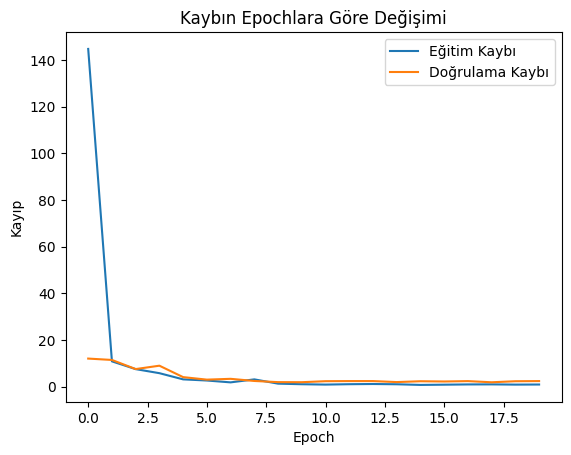

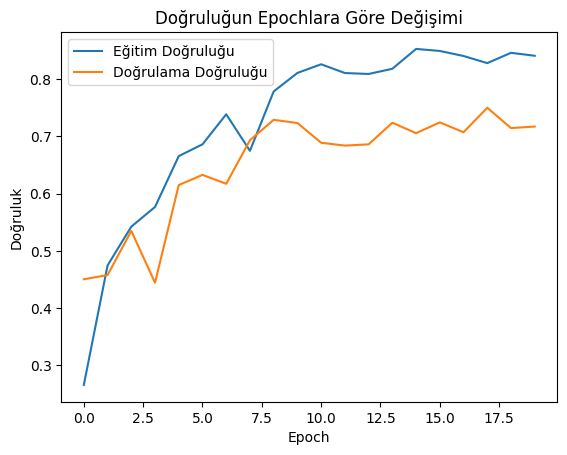

In [203]:
import matplotlib.pyplot as plt

# Kayıp grafiği
plt.plot(train_loss, label='Eğitim Kaybı')
plt.plot(val_loss, label='Doğrulama Kaybı')
plt.title('Kaybın Epochlara Göre Değişimi')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(train_accuracy, label='Eğitim Doğruluğu')
plt.plot(val_accuracy, label='Doğrulama Doğruluğu')
plt.title('Doğruluğun Epochlara Göre Değişimi')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


# Modeli Test Etme

In [205]:
# Test verileri ile modelin değerlendirilmesi
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test_onehot)
print(f'Test Kaybı: {test_loss:.4f}, Test Doğruluğu: {test_accuracy:.4f}')


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7183 - loss: 2.1841
Test Kaybı: 2.1754, Test Doğruluğu: 0.7122


# Prediction

In [206]:
# Tahminler
predictions = model.predict(X_test_flattened)

# Tahmin sonuçlarını en yüksek olasılığa sahip sınıfa dönüştürme
predicted_classes = np.argmax(predictions, axis=1)

# Sonuçları kontrol et
print("Tahmin edilen sınıflar:", predicted_classes)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tahmin edilen sınıflar: [10  4  2 ... 14  5 12]


# Kayıp Fonksiyonu Grafiği

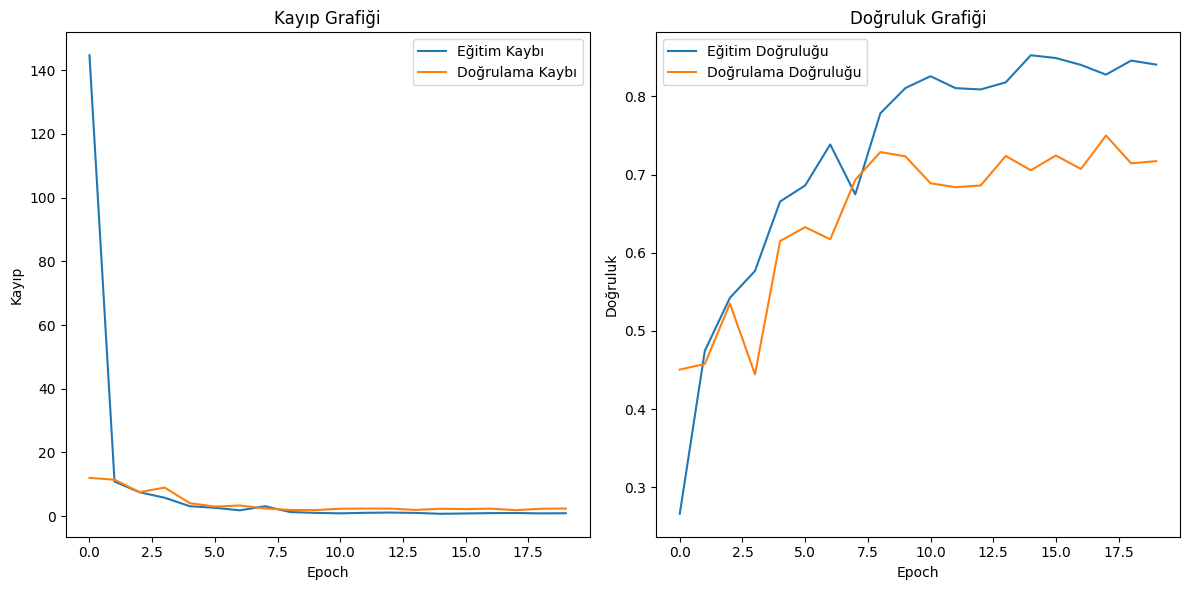

In [207]:
# Kayıp ve doğruluk değerlerini al
loss = results.history['loss']
val_loss = results.history['val_loss']
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

# Kayıp grafiği
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Eğitim Kaybı')
plt.plot(val_loss, label='Doğrulama Kaybı')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Eğitim Doğruluğu')
plt.plot(val_accuracy, label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix

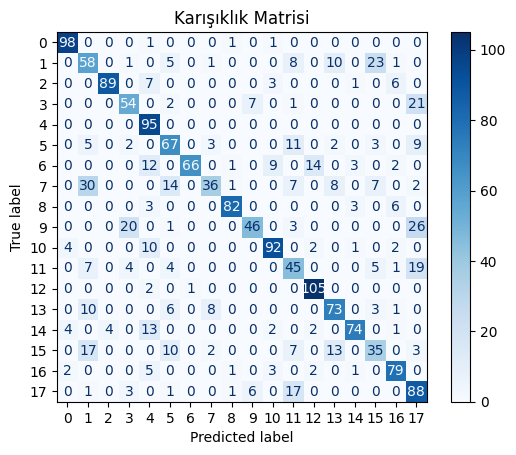

In [212]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test_onehot'u sınıf etiketlerine dönüştür
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Karışıklık matrisini oluştur
cm = confusion_matrix(y_test_classes, predicted_classes)

# Karışıklık matrisini görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_classes))
disp.plot(cmap=plt.cm.Blues)
plt.title('Karışıklık Matrisi')
plt.show()


In [213]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu al
report = classification_report(y_test_classes, predicted_classes)
print(report)


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       101
           1       0.45      0.54      0.49       107
           2       0.96      0.84      0.89       106
           3       0.64      0.64      0.64        85
           4       0.64      1.00      0.78        95
           5       0.61      0.66      0.63       102
           6       0.99      0.62      0.76       107
           7       0.72      0.34      0.46       105
           8       0.94      0.87      0.91        94
           9       0.78      0.48      0.59        96
          10       0.84      0.83      0.83       111
          11       0.45      0.53      0.49        85
          12       0.84      0.97      0.90       108
          13       0.69      0.72      0.71       101
          14       0.89      0.74      0.81       100
          15       0.46      0.40      0.43        87
          16       0.80      0.85      0.82        93
          17       0.52    